## This is a basic explanation of Bayes' Rule and some examples for teaching purposes.  

In [38]:
options(repos = c('https://cloud.r-project.org/'))
options(digits=3)
install.packages(c("ggplot2", "dplyr", "sciplot", "repr", "VennDiagram"))
library("ggplot2")
library("VennDiagram")

Installing packages into 'C:/Users/Natalie/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
also installing the dependencies 'formatR', 'lambda.r', 'futile.options', 'futile.logger'



package 'formatR' successfully unpacked and MD5 sums checked
package 'lambda.r' successfully unpacked and MD5 sums checked
package 'futile.options' successfully unpacked and MD5 sums checked
package 'futile.logger' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked
package 'sciplot' successfully unpacked and MD5 sums checked
package 'repr' successfully unpacked and MD5 sums checked
package 'VennDiagram' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Natalie\AppData\Local\Temp\Rtmp6zVTEr\downloaded_packages


Loading required package: grid
Loading required package: futile.logger


Have you ever wondered how likely something is given another event occured? Perhaps you're wondering how likely we are to see more manufacturing jobs in the US, $\textit{given}$ Donald Trump is president. Or how likely the Capitals are to win the Stanley Cup, $\textit{given}$ their star player is hurt?

If questions like these cross your mind, you may need a tool to determine the probability of one event given the other event occured. This is $\textbf{Bayes' Rule}$ of conditional probability!

The probability that the Capitals win, $\textit{given}$ their star is hurt is the overlapping area in the venn diagram (purple) below.

(polygon[GRID.polygon.1], polygon[GRID.polygon.2], polygon[GRID.polygon.3], polygon[GRID.polygon.4], text[GRID.text.5], text[GRID.text.6], text[GRID.text.7], text[GRID.text.8], text[GRID.text.9]) 

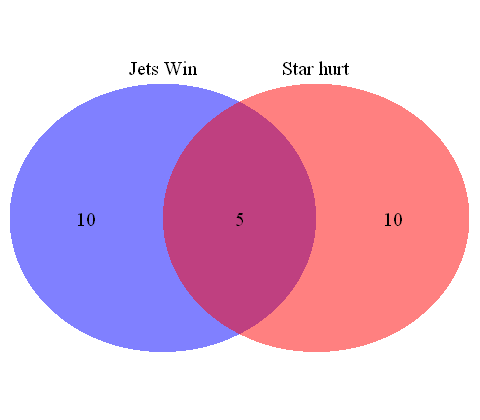

In [39]:
options(repr.plot.width=4, repr.plot.height=3.5)
draw.pairwise.venn(15, 15, cross.area=5, category = c("Capitalss Win", "Star hurt"), lty = rep("blank", 
2), fill = c("blue", "red"), alpha = rep(0.5, 2), cat.pos = c(0, 
 0), cat.dist = rep(0.025, 2), scaled = FALSE)

Clearly the probability of the Capitals winning is greater when their star is $\textit{not}$ hurt, as the blue circle area (not includuing the purple overlap area) is much larger than the middle of the venn diagram where both the Capitals win and the Star is hurt.

A = probability of Capitals winning

B = probability star is hurt

In probability, this is expressed as:

$P(A|B) = \frac{P(A\cap B)}{P(B)}$

The probability of A (Capitals win) Given (|) B (star is hurt) = the probability of A and B both occuring, divided by the probability of B occuring. We know intuitively that the probability of 2 things happening together is lower than 1 thing happening on it's own. This is Bayes' Rule, you are trying to determine how likely event 'A' is given that B already happened. 

$P(A\cap B) = P(B|A) P(A) $


This same formula can be written as:

$P(A|B) = \frac{P(B|A) P(A)}{P(B)}$

Let's try this hockey example out, we know the Capitals have a high chance of winning at 60%, and the liklihood of getting hurt on the ice is 20%. The chances of them winning decrease by 20% if the star is hurt. If you heard the Capitals won the Stanley Cup, what is the probability their star was hurt?


P(Win) = 0.60

P(Hurt) = 0.20

P(Win|Hurt) = 0.40

P(Hurt|Win) = ?


$P(Hurt|Win) = \frac{P(Hurt) P(Win|Hurt)}{P(Win)}$

$P(Hurt|Win) = \frac{0.2* 0.4}{0.6}$ = 0.133 = 13%

This is the basic concept of Bayes' Theorem.

But what if you have some idea about your paramater of interest, and then later you collect some data. Wouldn't it be great if we could update our probabilities with the new data?  This is possible with Bayes'. But, instead of calculating 1 probability, we'll create a distribution and summarize how likely something is.

#### It turns out Bayes' Theorem is often expressed in terms of 'Priors' and 'Posteriors'.

Given a prior hypothesis $\textbf{H}$, and some posterior evidence $\textbf{E}$, the probabilty of the hypothesis distribution prior to any evidence $\textbf{P(H)}$, and the posterior probability distribution of the hypothesis given some evidence $\textbf{P(H|E)}$ is the same as conditional probability:

$P(H|E) = \frac{P(E|H) P(H)}{P(E)}$ 


$P(H|E)$ = Posterior probability

$P(H)$ = Prior Probability

$P(E|H)$ = Likelihood

$P(E)$ = Evidence

Bayes' Theorem now becomes: the Posterior probability distribution equals the Prior probability distribution multiplied by the Likelihood, and normalized by the Evidence (or data).

This is particularily useful when you are training models to get better over time, or update values based on some conditions. For example, Amazon may suggest products to you given your previous purchases. As you make more purchases, the ability to predict what you may like increases.

Let's look at an example. 
Say you're the city manager of Austin planning a free concert, and you want to know about how many people will come so you can plan ahead and order the right amount of food. Woah big city! And a heck of a music scene! This seems like a big task. 
We've been doing this a few years, and we think the crowd is normally distributed with a mean size of 12 million people, and a standard deviation of 4 million, prior to observing actual data. 

### Let's walk through the Bayes' approach:
1. Identify possible models and construct prior probabilities (based on our knowledge or beliefs)
2. Collect data and create liklihoods, or the chance of getting this data given each model 
3. Use Bayes' rule to find posterior probabilities and update our knowledge so we can determine which model is likely to be correct


##### 1. The probability density function of our Prior is based on the normal model where we assume the mean=12 and sd=4:

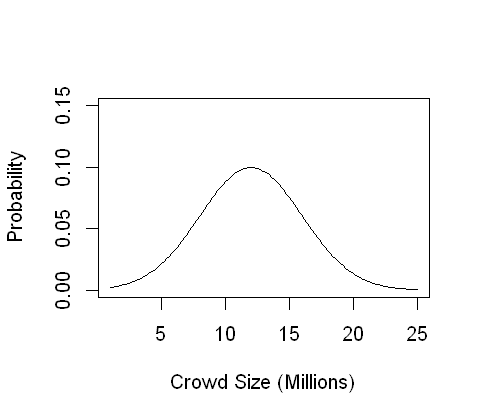

In [40]:
x=seq(1,25, by=.2)
prior_mean=12
prior_sd=4
Prior=dnorm(x, mean=prior_mean, sd=prior_sd)#assumes our model is true
plot(x,Prior, type='l', ylab='Probability', xlab='Crowd Size (Millions)', ylim=c(0,.15))

$2.$ Now, we collect some data from other concerts

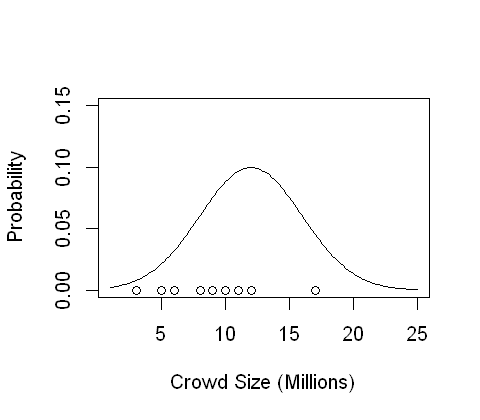

In [41]:
size=sort(c(5,8,3,12,10,8,6,17,11,5,9,10,12,6,10))
ysize=seq(0,0, length.out=15)
plot(x,Prior, type='l', ylab='Probability', xlab='Crowd Size (Millions)' ,ylim=c(0,.15))
points(size,ysize)

##### 2. Now, with this observed data (circles above) we can calculate the Likelihood of observing these data (crowd sizes) given the distribution is normal.
We are testing the model where the mean of he normal distribution is 'x' and spans the crowd sizes 1-25 million. In this way we test how likely the observed data is, given our model (or hypothesis) is true.

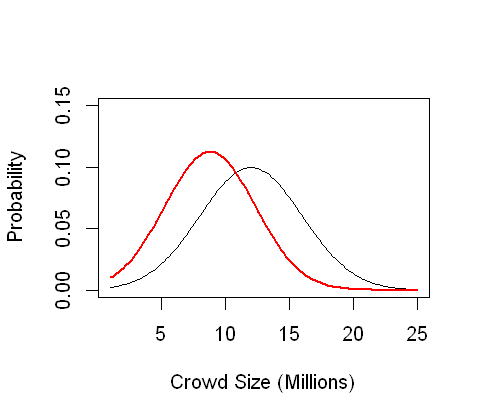

In [42]:
data_mean=mean(size)
data_sd=sd(size)
x_size=seq(1,25, by=.2)
Likelihood=dnorm(data_mean, mean=x, sd=data_sd) #we are testing the model where the mean of the normal distribution is 'x' and spans 1-25. 
#In this way we test how likely the observed data is, given our model is true.
plot(x,Prior, type='l', ylab='Probability', xlab='Crowd Size (Millions)', ylim=c(0,.15))
lines(x_size, Likelihood, col='red' ,lwd=2)

The Likelihood distribution is shown in red. It shows a range of crowd sizes (x axis) and the likelihood that that crowd size explains the data we observed. Likelihood is just a conditional probability (see the |) of the data given the hypothesis. In this case, if we hypothesized the average crowd size was 15 million, we have an approximately 0.025 chance that our observed data came from this hypothesized model. We have the best chance that our data came from a distribution where the true crowd mean is roughly 9 million.

$ Now\ this\ is\ where\ the\ magic\ happens!$ 

##### 3. In Bayesian statistics, we can use the $Prior$ and the $Likelihood$ to determine the $Posterior$ distribution:

$Posterior = Prior x Likelihood$

The Prior is called a conjugate prior for the Likelihood function. Thus, when we know our Liklihood function, we can cleverly select (or look up the known conjugates), the Prior distribution so we can determine the Posterior distribution. These are called $conjugate\ distributions$ This helps simplify our ability to calculate the Posterior.

$Posterior = Normal x Normal $

$Posterior=Normal$

This is not always the case, many conjugates are different distributions (i.e, binomial and beta conjugates). But in this example, all we need to know is that the Posterior distribution is also a Normal distribution. Using some fancy math, we can now calculate the Posterior as a function of our Prior and observed data.

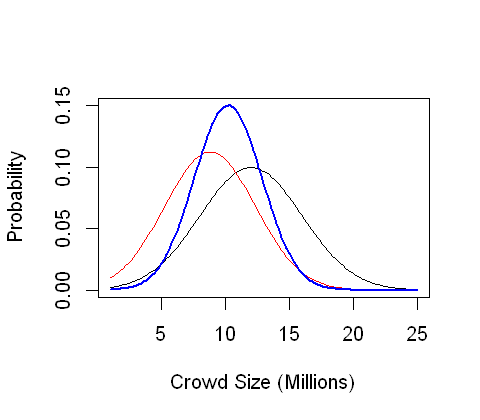

In [43]:
Prior_precision=1/(prior_sd^2)
Data_precision=1/(data_sd^2)
Posterior_precision=Prior_precision+Data_precision
Posterior_sd=1/sqrt(Posterior_precision)
Posterior_mean=((prior_mean*Prior_precision)+(data_mean*Data_precision))/(Prior_precision+Data_precision)

Posterior=dnorm(x, mean=Posterior_mean, sd=Posterior_sd)

plot(x,Prior, type='l', ylab='Probability', xlab='Crowd Size (Millions)', ylim=c(0,.15))
lines(x_size, Likelihood, col='red')
lines(x, Posterior, col='blue', lwd=2)

The blue line represents the $Posterior$ distribution. This describes which crowd size maximizes the chance of observing our data, while considering our prior beliefs. The probability of each crowd size being true $given$ our evidence.
We can see that the Posterior distribution is narrower than the Prior distribution and we are more confident in the true average crowd size at this concert. 

## Inferences with Bayes


In [44]:
Our boss (the Mayor!) asks us to calculate the probability that more than 15 million people will attend. If there is high attendance we may need to add more police and security to this event.

Using the classical (Frequentist) approach, we must calculate our test statistic and p-value from the Prior distribution:

ERROR: Error in parse(text = x, srcfile = src): <text>:1:5: unexpected symbol
1: Our boss
        ^


In [49]:
options(digits=3)
round(pnorm(15, mean=prior_mean, sd=prior_sd, lower.tail=FALSE),4)

[1] 0.227

There is a 22% chance our crows will be greater than 15 million people! 

Let's check this with our Bayesian approach:

In [50]:
round(pnorm(15, mean=Posterior_mean, sd=Posterior_sd, lower.tail=FALSE),4)

[1] 0.0356

Now with our Bayesian estimate, there is a 4% chance that the crows will be larger than 15 million. With this estimate, we would recommend that the Mayor not hire more security. This is great! We are more sure of our true crowd size with this Posterior estimate!

### Now, if we had some Prior distribution where we cannot solve the Posterior, we might consider running simmulations to help us approximate our paramater (crowd size) of interest. We can do this with Markov Chain Monte Carlo (MCMC) simulations. 

In a nutshell the MCMC does:
1. Picks a random paramater value to start, subsequent values do not depend on this starting point
2. Continue to generate random values (Monte Carlo) subject to some rule for determining what makes a good paramater value
3. Evaluate if the newly created paramater (t+1) is better than the original (t), if it is, keep the new paramater and add it to the list of paramater values we already collected (Markov Chain)
4. Summarize this chain of collected paramater values into a distribution (Posterior) and draw inferences

A $Monte Carlo$ simulations are a way of estimating a paramater by generating random numbers repeatedly. Doing statistics on the random numbers we can approximate the true paramater of interest.
A $Markov Chain$ is a sequence of values that are related to one another through known probabilities.

When we do a Monte Carlo Markov Chain, we create random values (Monte Carlo), but those values are only retained in the Markov Chain if they pass some criteria related to the Prior. In this way, the chain of collected paramater values will have a greater frequency of values near the true paramater, as this will better explain the observed data. 

Our goal is still the same, create a Posterior distribution based on our Prior and the likelihood of observing the new value (think of this like the observed data) given our proposed model. Each simulation is dependent on the previous value and our 'chain' of these accepted values gives us a good approximation of our true paramater of interest.

We generate random values from our proposed model, a normal distribution with mean=12 and sd=4. This is our Prior distribution. For each of the new values generated we compare it to the previous value, and if the likelihood of observing this new value is better we keep it and store it in our Chain, if not we keep the previous value. 

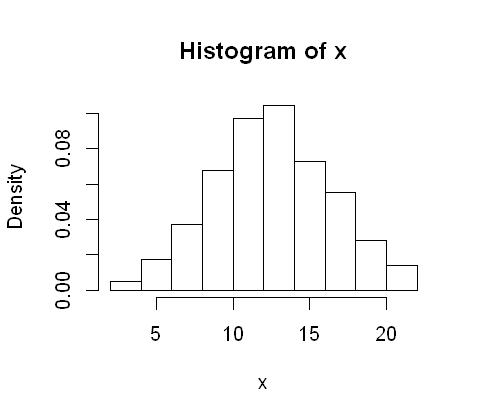

In [47]:
#use a normal distribution for simplicity
#generate random numbers from a normal distribution, where the mean
#prior we assume mean=12 sd=4
#posterior we are solving for mean, but we know sd_posterior=3

#The whole purpose of MCMC is to sample from the (known) target distribution, because handling it with other methods is difficult. 

x=vector()
x[1]=8
mu_prior=12
sd_prior=4
sd_post=3
for (i in 1:3000) {
    # new random value generated
    xp <- rnorm(1, mean=x[i], sd=sd_post)
     # Determine if we accept new value or not
    likelihood_xp=dnorm(xp, mu_prior, sd_prior)
    likelihood_x=dnorm(x, mu_prior, sd_prior)
    alpha <- min(1, (likelihood_xp) / (likelihood_x))#use a ratio for acceptance criteria, otherwise you will have a hill climbing algorithm where it will only accept values that continue to improve.
    # Accept new point if it passes the criteria test
    if (runif(1) < alpha)
        x[i+1] <- xp
    else x[i+1]=x[i]
}
hist(x, freq = FALSE)

Now we can draw inferences from this Posterior distribution just like we did before.


## In Summary:
1. Bayes' Theory deals with conditional probability
2. If you have some prior knowledge and a proposed model to evaluate, you can "sample" from the Posterior distribution and draw inferences just like you would in other statistical tests
3. Bayes' allows you to narrow your estimates, if you do enough simulations, to improve on the classical statistical approach